In [2]:
import plotly.graph_objects as go
import numpy as np

#%matplotlib notebook
import matplotlib.pyplot as plt


In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [4]:
from matplotlib import interactive
interactive(True)
#%matplotlib inline 
#%matplotlib notebook


In [5]:
data = np.loadtxt(fname='ex1data1.txt', delimiter=',')
#data2 = np.loadtxt(fname='ex1data2.txt', delimiter=',')


In [6]:
x = np.copy(data[:,0])
y = np.copy(data[:,1])
m = np.shape(x)[0]

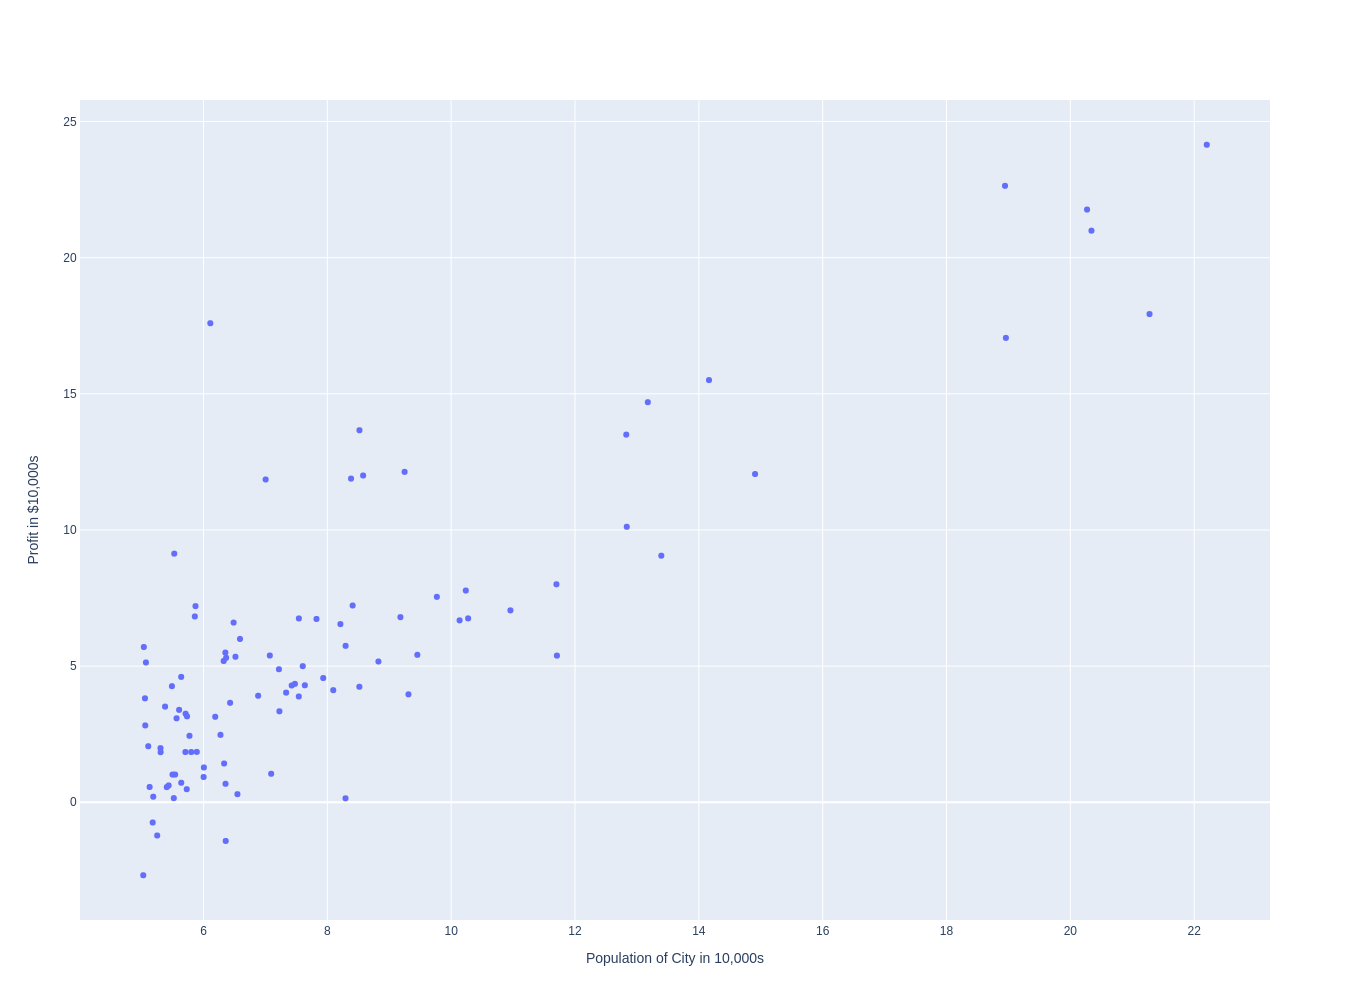

In [7]:
fig1 = go.Figure()

layout = go.Layout(
                    autosize=False,
                    width=1000,
                    height=1000,
                    xaxis = dict( title_text = "Population of City in 10,000s"),
                    yaxis = dict( title_text = "Profit in $10,000s")
    )

trace1 = go.Scatter(
                    x = x,
                    y = y,
                    mode='markers'
)

fig1.layout = layout
fig1.add_trace( trace1 )



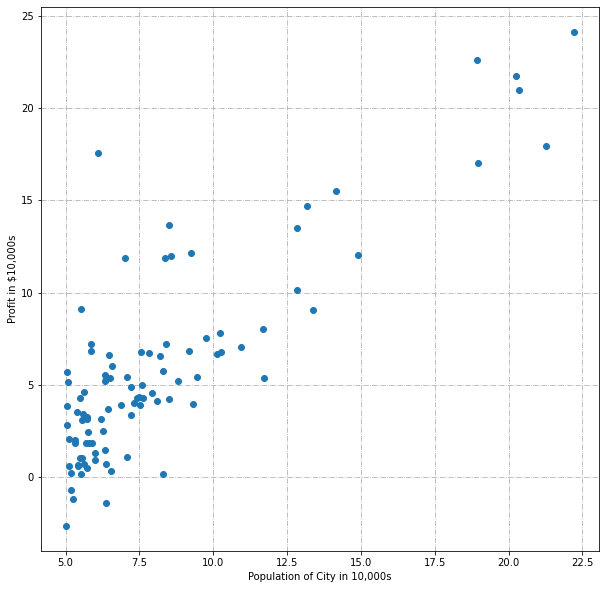

In [8]:

fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

ax.plot(x, y, 'o' )
ax.set_xlabel("Population of City in 10,000s")
ax.set_ylabel("Profit in $10,000s")

plt.show()

Objective linear regresion is to minimze the cost function:
    $J(\Theta) = \frac{1}{2m}\sum^m_{i=1}( h_\Theta(x^{(i)} -y^{(i )})^2 $

where the hypothesis $h_\Theta (x)$ is given by linear model   $h_\Theta (x) = \Theta^Tx = \Theta_0 + \Theta_1 x_1 $

implementation of $J(\Theta) = \frac{\alpha}{2m}\sum^m_{i=1}( h_\Theta(x^{(i)}) -y^{(i )})^2 $

In [9]:
def computeCost(X, y, theta):
    
    m = np.shape(X)[0]

    J =  1.0/(2*m)   * np.sum( (np.dot(X, theta) -y)**2 )  
    
    return J 

In [10]:
def gradientDescent_simple(X, y, theta, alpha, num_iters):
    print 
    m = np.shape(X)[0]
    J_history = np.zeros(m, dtype=np.float64)
    
    for i in range(num_iters):
        theta = theta - ( (alpha/( m)  ) * np.dot(np.transpose(X), (np.dot(X, theta) -y)) )
    
    return theta, J_history

In [11]:
iterations = 6500;
alpha = 0.01;

In [12]:
theta = np.zeros([2])
iterations = 2

In [13]:
X = np.ones([m,2])
X[:,1] = x
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [14]:
computeCost(X, y, theta)

32.072733877455676

In [39]:
theta[0]=-1
theta[1]=2

computeCost(X, y, theta)

54.24245508201238

In [15]:
theta[0]=0
theta[1]=0

In [16]:
iterations = 26500
alpha = 0.01
theta, J_history = gradientDescent_simple(X=X, y=y , theta=theta, alpha=alpha, num_iters=iterations )
theta

array([-3.89578088,  1.19303364])

In [19]:
np.dot(np.dot(np.linalg.inv( np.dot(np.transpose(X),X) ) , np.transpose(X)  ),y)

array([-3.89578088,  1.19303364])

In [42]:
computeCost(X, y, theta)

4.476971375975179

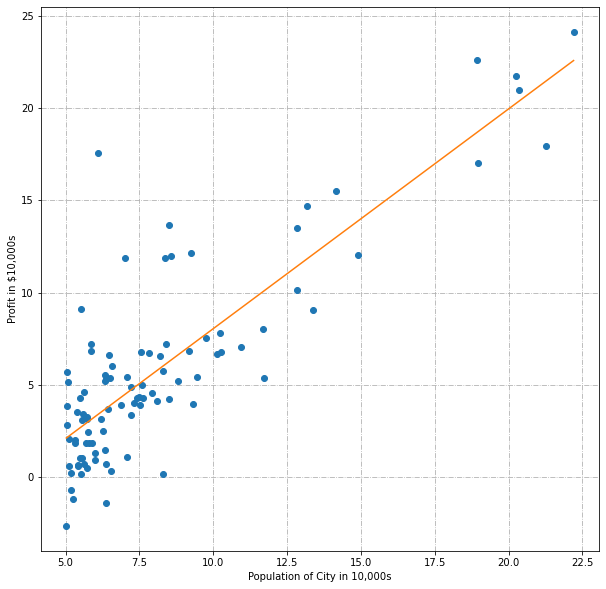

In [18]:
X_line = np.ones([m,2])
X_line[:,1] = np.linspace( x.min(), x.max(), m )

fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

ax.plot(x, y, 'o' )
ax.plot(X_line[:,1], np.dot(X_line, theta), '-' )

ax.set_xlabel("Population of City in 10,000s")
ax.set_ylabel("Profit in $10,000s")

plt.show()



Predict values for population sizes of 35,000 and 70,000

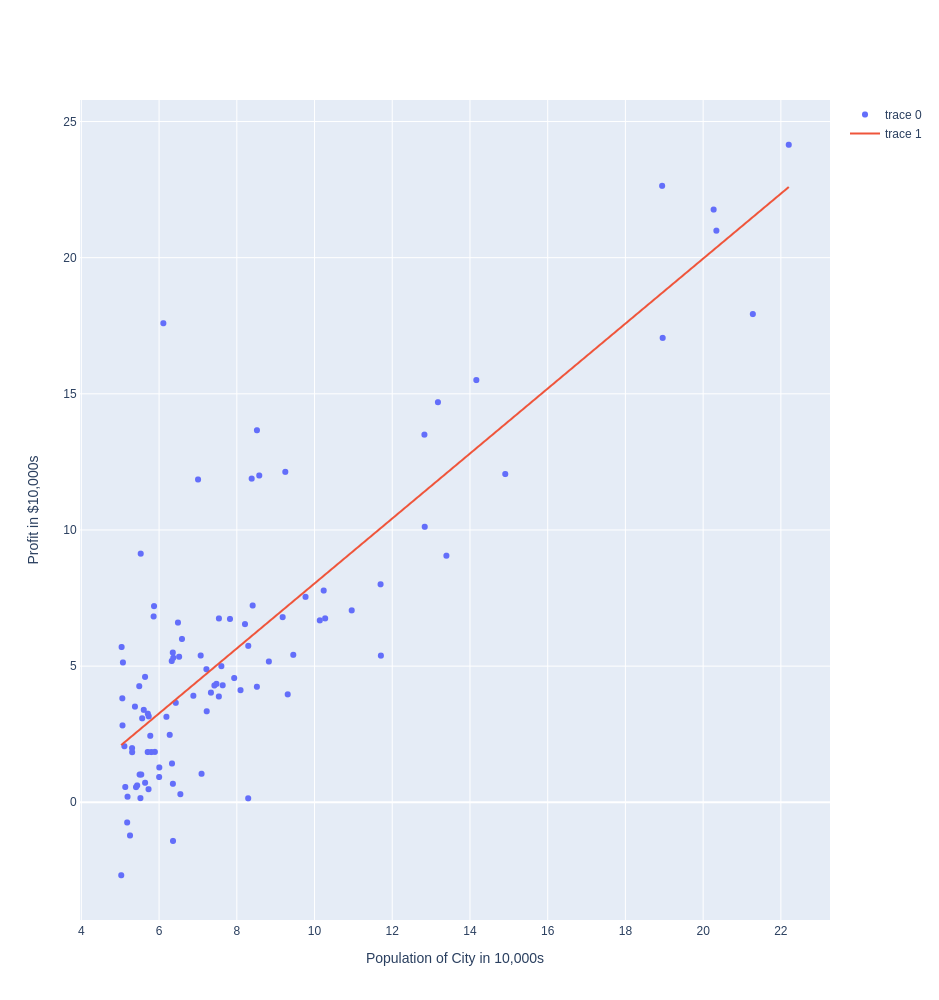

In [19]:
fig2 = go.Figure()

layout = go.Layout( autosize=False,
                    width=1000,
                    height=1000,
                    xaxis = dict( title_text = "Population of City in 10,000s"),
                    yaxis = dict( title_text = "Profit in $10,000s") )

trace1 = go.Scatter( x = x,
                     y = y,
                     mode='markers' )
trace2 = go.Scatter( x = X_line[:,1], 
                     y = np.dot(X_line, theta),
                     mode='lines' )

fig2.layout = layout
fig2.add_trace( trace1 )
fig2.add_trace( trace2 )


In [20]:
predict1 = np.dot([1, 3.5], theta)
print(f'For population = 35,000, we predict a profit of { predict1 * 10000 }'  )

For population = 35,000, we predict a profit of 2798.36876351804


In [21]:
predict1 = np.dot([1, 7], theta)
print(f'For population = 70,000, we predict a profit of { predict1 * 10000 }'  )

For population = 70,000, we predict a profit of 44554.546310153375


In [22]:
theta0_vals = np.linspace(-10, 10, 300)
theta1_vals = np.linspace(-1, 4, 300)

In [23]:
J_vals = np.zeros([np.shape(theta0_vals)[0], np.shape(theta1_vals)[0]])


In [24]:
for i in range(np.shape(theta0_vals)[0]):
    for j in range(np.shape(theta1_vals)[0]):
        t = (theta0_vals[i], theta1_vals[j])
        J_vals[i,j] = computeCost(X, y, t)

In [20]:

fig_3d = go.Figure(go.Surface(
    contours = { "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
                 "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = theta0_vals,
    y = theta1_vals,
    z = J_vals ))
fig_3d.update_layout( autosize=False,
                      width=1000,
                      height=1000,
                      title='J_vals', 

               #   margin=dict(l=65, r=50, b=65, t=90)
                    )
fig_3d.show()

NameError: name 'theta0_vals' is not defined

In [ ]:
fig_3d = go.Figure(go.Surface(
    contours = { "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
                 "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    },
    x = theta0_vals,
    y = theta1_vals,
    z = np.log(J_vals) ))
fig_3d.update_layout( autosize=False,
                      width=1000,
                      height=1000,
                      title='J_vals', 

               #   margin=dict(l=65, r=50, b=65, t=90)
                    )
fig_3d.show()

In [ ]:
4.483388256587725

In [ ]:
array([-3.63029144,  1.16636235])